In [1]:
import os
import numpy as np
import pandas as pd

from dask_searchcv import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, roc_auc_score, make_scorer

from lightning.classification import SAGAClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Set constants
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]
betas = [0.1, 0.5, 1.0, 1.5, 2.0]

In [4]:
file = os.path.join('data', 'compass_x_train.tsv.gz')
x_df = pd.read_table(file, index_col=0).T
print(x_df.shape)
x_df.head(2)

(706, 8000)


GENE_ID,ENSG00000000419,ENSG00000001036,ENSG00000001167,ENSG00000001461,ENSG00000001561,ENSG00000001629,ENSG00000001630,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000273015,ENSG00000273018,ENSG00000273047,ENSG00000273061,ENSG00000273148,ENSG00000273173,ENSG00000273271,ENSG00000273338,ENSG00000273344,ENSG00000273472
MMRF_1021_1_BM,0.002039,0.001428,0.000656,0.001638,0.001126,0.000682,0.002040,0.000836,0.001092,0.003595,...,0.000773,0.000953,0.001499,0.000390,0.000284,0.007063,0.000252,0.005463,0.000286,0.000517
MMRF_1024_2_BM,0.001164,0.000949,0.000828,0.000658,0.000866,0.000776,0.001559,0.000898,0.001600,0.001572,...,0.001248,0.006047,0.000600,0.000672,0.000420,0.004150,0.000222,0.001641,0.000427,0.000931


In [5]:
file = os.path.join('data', 'compass_y_train.tsv')
y_df = pd.read_table(file, index_col=0)
print(y_df.shape)
y_df.head(2)

(706, 1)


,ras_status
MMRF_1021_1_BM,1
MMRF_1024_2_BM,0


In [6]:
weighted_f1 = make_scorer(f1_score, average='weighted')

In [8]:
clf_parameters = {'classify__loss': ['log'],
                  'classify__penalty': ['l1'],
                  'classify__alpha': alphas,
                  'classify__beta': betas,
                  'classify__max_iter': [100]}

In [11]:
estimator = Pipeline(
    steps=[('classify',
            SAGAClassifier())]
)

cv_pipeline = GridSearchCV(estimator=estimator,
                           param_grid=clf_parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring=weighted_f1)

In [12]:
cv_pipeline.fit(X=x_df, y=y_df.ras_status )

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cache_cv=True, cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('classify', SAGAClassifier(alpha=1.0, beta=0.0, callback=None, eta='auto', gamma=1.0,
        loss='smooth_hinge', max_iter=10, n_inner=1.0, penalty=None,
        random_state=None, tol=0.001, verbose=0))]),
       iid=True, n_jobs=-1,
       param_grid={'classify__penalty': ['l1'], 'classify__alpha': [0.1, 0.5, 1.0, 1.5, 2.0], 'classify__loss': ['log'], 'classify__beta': [0.1, 0.5, 1.0, 1.5, 2.0], 'classify__max_iter': [100]},
       refit=True, return_train_score='warn', scheduler=None,
       scoring=make_scorer(f1_score, average=weighted))

In [13]:
cv_results = pd.concat([pd.DataFrame(cv_pipeline.cv_results_)
                          .drop('params', axis=1),
                        pd.DataFrame.from_records(cv_pipeline
                                                  .cv_results_['params'])],
                       axis=1)

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in sklearn 0.21. If you need training sc

In [73]:
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classify__C,param_classify__alpha,param_classify__loss,param_classify__max_iter,param_classify__penalty,rank_test_score,...,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,classify__C,classify__alpha,classify__loss,classify__max_iter,classify__penalty
0,8.468005,0.004619,0.476817,0.476816,0.1,0.1,log,100,tv1d,1,...,0.475573,0.077674,0.000274,0.00328,0.000816,0.1,0.1,log,100,tv1d
1,7.445560,0.005037,0.476817,0.476816,0.1,0.5,log,100,tv1d,1,...,0.475573,0.501214,0.000510,0.00328,0.000816,0.1,0.5,log,100,tv1d
2,7.364064,0.005915,0.476817,0.476816,0.1,1,log,100,tv1d,1,...,0.475573,0.579682,0.001748,0.00328,0.000816,0.1,1.0,log,100,tv1d
3,7.333935,0.005580,0.476817,0.476816,0.1,1.5,log,100,tv1d,1,...,0.475573,0.467450,0.002193,0.00328,0.000816,0.1,1.5,log,100,tv1d
4,6.959374,0.009269,0.476817,0.476816,0.1,2,log,100,tv1d,1,...,0.475573,0.292146,0.005777,0.00328,0.000816,0.1,2.0,log,100,tv1d
5,7.870943,0.007379,0.476817,0.476816,0.5,0.1,log,100,tv1d,1,...,0.475573,0.410091,0.005859,0.00328,0.000816,0.5,0.1,log,100,tv1d
6,7.781191,0.010567,0.476817,0.476816,0.5,0.5,log,100,tv1d,1,...,0.475573,0.396093,0.007772,0.00328,0.000816,0.5,0.5,log,100,tv1d
7,7.412446,0.004676,0.476817,0.476816,0.5,1,log,100,tv1d,1,...,0.475573,0.446855,0.000258,0.00328,0.000816,0.5,1.0,log,100,tv1d
8,6.639296,0.006025,0.476817,0.476816,0.5,1.5,log,100,tv1d,1,...,0.475573,0.285167,0.003167,0.00328,0.000816,0.5,1.5,log,100,tv1d
9,6.647622,0.010121,0.476817,0.476816,0.5,2,log,100,tv1d,1,...,0.475573,0.290300,0.010884,0.00328,0.000816,0.5,2.0,log,100,tv1d


In [46]:
a = pd.DataFrame(cv_pipeline.best_estimator_.named_steps['classify'].coef_).T
a.columns = ['wildtype', 'KRAS', 'NRAS']
a.index = x_df.columns
a.head()

,wildtype,KRAS,NRAS
GENE_ID,,,
ENSG00000000419,0.000310,-0.000115,-0.000195
ENSG00000001036,0.000278,-0.000108,-0.000170
ENSG00000001167,0.000129,-0.000057,-0.000072
ENSG00000001461,0.000101,-0.000044,-0.000057
ENSG00000001561,0.000110,-0.000046,-0.000064


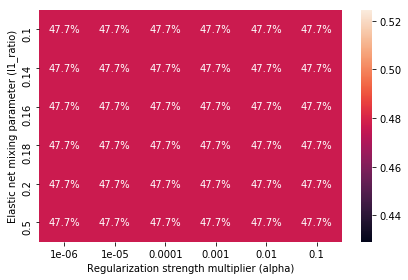

In [48]:
# Cross-validated performance heatmap
cv_score_mat = pd.pivot_table(cv_results, values='mean_test_score',
                              index='classify__C',
                              columns='classify__alpha')
ax = sns.heatmap(cv_score_mat, annot=True, fmt='.1%')
ax.set_xlabel('Regularization strength multiplier (alpha)')
ax.set_ylabel('Elastic net mixing parameter (l1_ratio)')
plt.tight_layout()

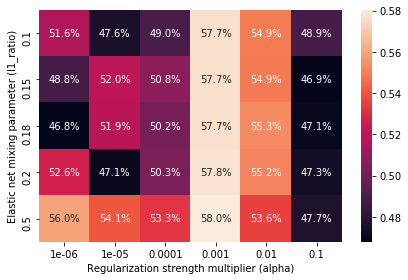

In [199]:
# Cross-validated performance heatmap
cv_score_mat = pd.pivot_table(cv_results, values='mean_test_score',
                              index='classify__l1_ratio',
                              columns='classify__alpha')
ax = sns.heatmap(cv_score_mat, annot=True, fmt='.1%')
ax.set_xlabel('Regularization strength multiplier (alpha)')
ax.set_ylabel('Elastic net mixing parameter (l1_ratio)')
plt.tight_layout()

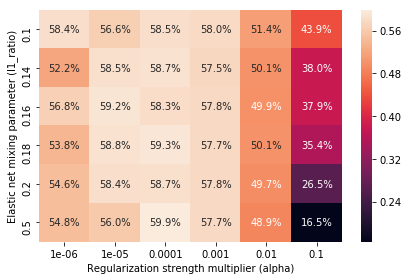

In [218]:
# Cross-validated performance heatmap
cv_score_mat = pd.pivot_table(cv_results, values='mean_test_score',
                              index='classify__l1_ratio',
                              columns='classify__alpha')
ax = sns.heatmap(cv_score_mat, annot=True, fmt='.1%')
ax.set_xlabel('Regularization strength multiplier (alpha)')
ax.set_ylabel('Elastic net mixing parameter (l1_ratio)')
plt.tight_layout()

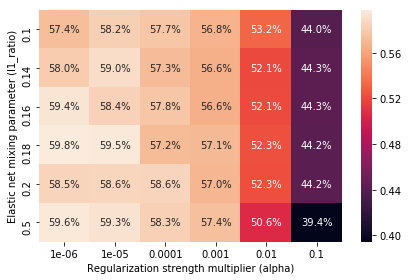

In [227]:
# Cross-validated performance heatmap
cv_score_mat = pd.pivot_table(cv_results, values='mean_test_score',
                              index='classify__l1_ratio',
                              columns='classify__alpha')
ax = sns.heatmap(cv_score_mat, annot=True, fmt='.1%')
ax.set_xlabel('Regularization strength multiplier (alpha)')
ax.set_ylabel('Elastic net mixing parameter (l1_ratio)')
plt.tight_layout()